In [1]:
import numpy as np
# Define the Hebbian Network
class HebbNetwork:
    def __init__(self, input_size):
        # Initialize weights to zero
        self.weights = np.zeros(input_size)
        

    def train(self, X, Y):
        """
        Train the network using Hebb's rule.

        Parameters:
        X: 2D numpy array of input patterns (bipolar values)
        Y: 1D numpy array of target outputs (bipolar values)
        """
        for x, y in zip(X, Y):
            self.weights += x * y  # Apply He
            print(self.weights)
            
    def predict(self, x):
        """
        Predict the output for a given input using sign activation.

        Parameters:
        x: input pattern

        Returns:
        1 or -1
        """
        net_input = np.dot(self.weights, x)
        return 1 if net_input >= 0 else -1


In [2]:
X = np.array([
    [-1, -1],   # 0 OR 0
    [-1,  1],   # 0 OR 1
    [ 1, -1],   # 1 OR 0
    [ 1,  1]    # 1 OR 1
])

# Target outputs in bipolar form
Y = np.array([-1, 1, 1, 1])  # Output of OR gate in bipolar

In [3]:
# Create and train the network
net = HebbNetwork(input_size=2)
net.train(X, Y)

# Test the model
print("Testing OR Gate with Hebb's Rule:")
for x, y in zip(X, Y):
    pred = net.predict(x)
    print(f"Input: {x}, Predicted: {pred}, Actual: {y}")

[1. 1.]
[0. 2.]
[1. 1.]
[2. 2.]
Testing OR Gate with Hebb's Rule:
Input: [-1 -1], Predicted: -1, Actual: -1
Input: [-1  1], Predicted: 1, Actual: 1
Input: [ 1 -1], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 1, Actual: 1


In [4]:
import matplotlib.pyplot as plt
import numpy as np

Initial Weights: [0. 0.]

Training on Example 1
Input: [-1 -1], Target: -1
Weight Change (Δw): [1 1]
Updated Weights: [1. 1.]

Training on Example 2
Input: [-1  1], Target: -1
Weight Change (Δw): [ 1 -1]
Updated Weights: [2. 0.]

Training on Example 3
Input: [ 1 -1], Target: -1
Weight Change (Δw): [-1  1]
Updated Weights: [1. 1.]

Training on Example 4
Input: [1 1], Target: 1
Weight Change (Δw): [1 1]
Updated Weights: [2. 2.]

Testing Hebb Network on AND Gate:
Input: [-1 -1], Predicted: -1, Actual: -1
Input: [-1  1], Predicted: 1, Actual: -1
Input: [ 1 -1], Predicted: 1, Actual: -1
Input: [1 1], Predicted: 1, Actual: 1


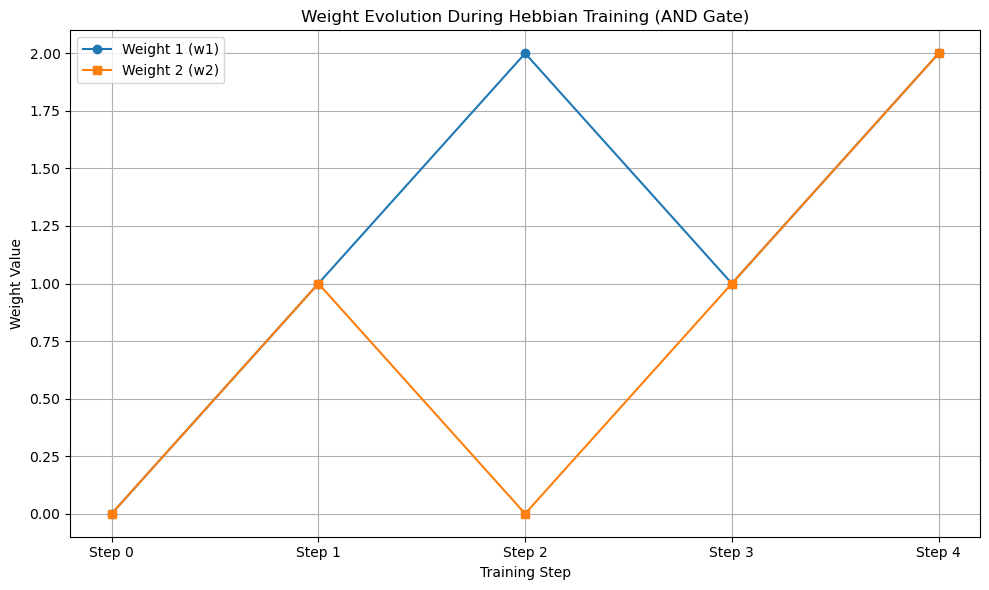

In [6]:
class HebbNetwork:
    def __init__(self, input_size):
        # Initialize weights to zero
        self.weights = np.zeros(input_size)
    
    def train(self, X, Y):
        """
        Train the network using Hebbian learning rule.
        Prints weight changes at each step.
        """
        print("Initial Weights:", self.weights)
        for i, (x, y) in enumerate(zip(X, Y)):
            delta_w = x * y
            self.weights += delta_w
            print(f"\nTraining on Example {i + 1}")
            print(f"Input: {x}, Target: {y}")
            print(f"Weight Change (Δw): {delta_w}")
            print(f"Updated Weights: {self.weights}")
        
    def predict(self, x):
        """
        Predict the output using the sign of net input.
        """
        net_input = np.dot(self.weights, x)
        return 1 if net_input >= 0 else -1
        
# Bipolar Input (0 -> -1, 1 -> 1) for AND Gate
X = np.array([
    [-1, -1],  # 0 AND 0 = 0 -> -1
    [-1,  1],  # 0 AND 1 = 0 -> -1
    [ 1, -1],  # 1 AND 0 = 0 -> -1
    [ 1,  1]   # 1 AND 1 = 1 ->  1
])

# Corresponding bipolar target outputs
Y = np.array([-1, -1, -1, 1])

# Create the network and train it
net = HebbNetwork(input_size=2)
net.train(X, Y)

# Test predictions after training
print("\nTesting Hebb Network on AND Gate:")
for x, y in zip(X, Y):
    prediction = net.predict(x)
    print(f"Input: {x}, Predicted: {prediction}, Actual: {y}")



# Bipolar input patterns for AND gate
X = np.array([
    [-1, -1],  # 0 AND 0 → -1
    [-1,  1],  # 0 AND 1 → -1
    [ 1, -1],  # 1 AND 0 → -1
    [ 1,  1]   # 1 AND 1 →  1
])

# Target outputs in bipolar format
Y = np.array([-1, -1, -1, 1])

# Initialize weights
weights = np.zeros(2)
weight_history = [weights.copy()]  # Track weight updates
# Hebb learning rule
for x, y in zip(X, Y):
    delta_w = x * y
    weights += delta_w
    weight_history.append(weights.copy())  # Save updated weights

# Convert weight history to NumPy array for plotting
weight_history = np.array(weight_history)
# Plotting the weight evolution
plt.figure(figsize=(10, 6))
plt.plot(weight_history[:, 0], marker='o', label='Weight 1 (w1)')
plt.plot(weight_history[:, 1], marker='s', label='Weight 2 (w2)')
plt.title('Weight Evolution During Hebbian Training (AND Gate)')
plt.xlabel('Training Step')
plt.ylabel('Weight Value')
plt.grid(True)
plt.legend()
plt.xticks(ticks=range(len(weight_history)), labels=[f"Step {i}" for i in range(len(weight_history))])
plt.tight_layout()
plt.show()